In [1]:
import pandas as pd


In [ ]:
!pip install kaggle
import os
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''

# Vytvořte složku
!mkdir histopathologic_cancer_detection

# Přepněte se do složky
%cd histopathologic_cancer_detection

# Stáhněte data
!kaggle competitions download -c histopathologic-cancer-detection

# Rozbalte data
!unzip histopathologic-cancer-detection.zip


In [3]:
train = pd.read_csv("/content/histopathologic_cancer_detection/train_labels.csv")
sub = pd.read_csv("/content/histopathologic_cancer_detection/sample_submission.csv")

In [4]:
train_pics = "/content/histopathologic_cancer_detection/train"
test_pics = "/content/histopathologic_cancer_detection/test"

In [5]:
def count_files_in_folder(folder):
    return len([f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])

train_count = count_files_in_folder(train_pics)
test_count = count_files_in_folder(test_pics)

print(f"Počet obrázků ve složce train: {train_count}")
print(f"Počet obrázků ve složce test: {test_count}")


Počet obrázků ve složce train: 220025
Počet obrázků ve složce test: 57458


In [6]:
train.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [7]:
train.shape

(220025, 2)

In [8]:
sub.head(50)

,id,label
0,0b2ea2a822ad23fdb1b5dd26653da899fbd2c0d5,0
1,95596b92e5066c5c52466c90b69ff089b39f2737,0
2,248e6738860e2ebcf6258cdc1f32f299e0c76914,0
3,2c35657e312966e9294eac6841726ff3a748febf,0
4,145782eb7caa1c516acbe2eda34d9a3f31c41fd6,0
5,725dabe6ecccc68b958a2c7dd75bcbf362c7cb03,0
6,aa0307865281d4484ddf8c637c348292968b93a7,0
7,f4e5dc9c949920f1b3362982e15e99bf6f3ef83b,0
8,95e08c9cedc28a9b4a86f4fc1e06c1972134be08,0
9,ee1f5345a8d4e28403b7e61b97b5f76c201ce9cb,0


In [9]:
sub.nunique()

id       57458
label        1
dtype: int64

In [10]:
sub.shape

(57458, 2)

### Data Vizualization

In [11]:
import plotly.express as px

In [12]:
train['label_name'] = train['label'].apply(lambda x: 'Negative' if x == 0 else 'Positive')

# Vytvoření koláčového grafu s upravenými popisky
fig = px.pie(train, names='label_name', title="Label Counts")

# Získání počtu hodnot v jednotlivých kategoriích
label_count = train['label'].value_counts()

# Výpis výsledků
for label, count in label_count.items():
    print(f'{train.loc[train["label"] == label, "label_name"].iloc[0]}: {count} ({count/len(train)*100:.2f}%)')

# Zobrazení grafu
fig.show()


Output hidden; open in https://colab.research.google.com to view.

In [13]:
import matplotlib.pyplot as plt
import cv2

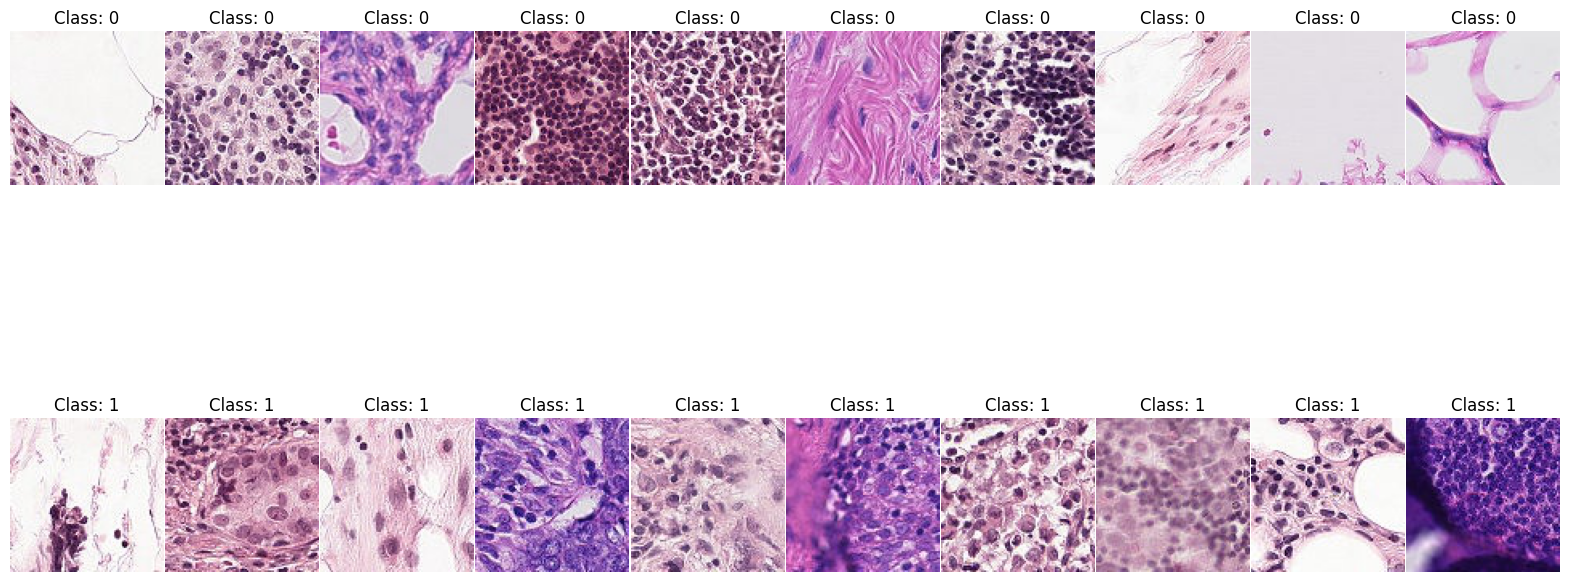

In [14]:
 # Získání štítků
labels = train['label'].values

# Vytvoření indexů pro třídy
index_class_0 = [i for i, label in enumerate(labels) if label == 0]
index_class_1 = [i for i, label in enumerate(labels) if label == 1]

# Výběr prvních 10 obrázků pro každou třídu
selected_indices_0 = index_class_0[:10]
selected_indices_1 = index_class_1[:10]

# Vizualizace obrázků
plt.figure(figsize=(20,10))

for i, index in enumerate(selected_indices_0):
    image_path = os.path.join('/content/histopathologic_cancer_detection/train', train['id'][index] + '.tif')
    img = cv2.imread(image_path)
    plt.subplot(2, 10, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Konverze barev z BGR do RGB
    plt.title(f"Class: {labels[index]}")
    plt.axis('off')

for i, index in enumerate(selected_indices_1):
    image_path = os.path.join('/content/histopathologic_cancer_detection/train', train['id'][index] + '.tif')
    img = cv2.imread(image_path)
    plt.subplot(2, 10, i+11)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Konverze barev z BGR do RGB
    plt.title(f"Class: {labels[index]}")
    plt.axis('off')

plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()

### Preprocessing

In [15]:
import torch
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from sklearn.model_selection import train_test_split
from PIL import Image
import torchvision.transforms as transforms
import numpy as np

In [16]:
class CustomImageDataset(Dataset):
    def __init__(self, csv_file, folder = './', transform=None):
        super().__init__()
        self.df = pd.read_csv(csv_file).values
        self.data_dir = folder
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
       img_name,label = self.df[idx]
       img_path = os.path.join(self.data_dir, img_name+'.tif')  # Přidáno '.tif'
       image = Image.open(img_path).convert('RGB')
       label = self.df[idx, 1]
       if self.transform:
        image = self.transform(image)
       return image, label



# Definujte transformace
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # změna velikosti obrázku
    transforms.ToTensor(),  # převod obrázku na tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # normalizace obrázku
])

# Load the entire dataset
full_data = CustomImageDataset('/content/histopathologic_cancer_detection/train_labels.csv', '/content/histopathologic_cancer_detection/train', transform=transform)

# Get the indices of the full dataset
indices = list(range(len(full_data)))

# Split the indices into training and testing sets
train_indices, test_indices = train_test_split(indices, test_size=0.2, random_state=42)

# Set Batch Size
batch_size = 128

# Percentage of training set to use as validation
valid_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_indices)
indices = list(range(num_train))

split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# Create samplers for training and testing sets
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

# Create data loaders for training and testing sets
train_loader = DataLoader(full_data, batch_size=batch_size, sampler=train_sampler)
test_loader = DataLoader(full_data, batch_size=batch_size, sampler=test_sampler)

In [17]:
# Vypište počet vzorků v tréninkové a testovací sadě
print(f"Počet vzorků v tréninkové sadě: {len(train_sampler)}")
print(f"Počet vzorků v testovací sadě: {len(test_sampler)}")

Počet vzorků v tréninkové sadě: 176020
Počet vzorků v testovací sadě: 44005


In [18]:
# Vypište počet dávek v DataLoader objektech
print(f"Počet dávek v tréninkovém DataLoaderu: {len(train_loader)}")
print(f"Počet dávek v testovacím DataLoaderu: {len(test_loader)}")

Počet dávek v tréninkovém DataLoaderu: 1376
Počet dávek v testovacím DataLoaderu: 344


In [19]:
# Vypište první dávku dat z tréninkového DataLoaderu
first_batch = next(iter(train_loader))
images, labels = first_batch
print(f"Velikost první dávky obrázků: {images.size()}")
print(f"Velikost první dávky popisků: {labels.size()}")

Velikost první dávky obrázků: torch.Size([128, 3, 32, 32])
Velikost první dávky popisků: torch.Size([128])


In [20]:
# Vypište první obrázek a jeho popisek
first_image = images[0]
first_label = labels[0]
print(f"První obrázek: {first_image}")
print(f"Popisek prvního obrázku: {first_label}")

První obrázek: tensor([[[ 0.4824,  0.1216, -0.1686,  ...,  0.5373,  0.1451, -0.2627],
         [ 0.5373,  0.2549,  0.2941,  ...,  0.5294,  0.3804, -0.0824],
         [ 0.0902, -0.2941,  0.3882,  ...,  0.5686,  0.3961, -0.1137],
         ...,
         [ 0.7725,  0.7725,  0.7647,  ...,  0.2784,  0.0667, -0.1137],
         [ 0.7647,  0.7647,  0.7647,  ...,  0.5373, -0.0039, -0.4902],
         [ 0.7647,  0.7647,  0.7647,  ...,  0.4824,  0.5059,  0.4353]],

        [[-0.1137, -0.3176, -0.3176,  ..., -0.0902, -0.4118, -0.5216],
         [ 0.0667,  0.0196,  0.2157,  ...,  0.0118, -0.0510, -0.3882],
         [-0.2078, -0.4902,  0.1608,  ...,  0.0980, -0.0039, -0.3647],
         ...,
         [ 0.7725,  0.7725,  0.7725,  ..., -0.1137, -0.2549, -0.3647],
         [ 0.7725,  0.7725,  0.7725,  ...,  0.0588, -0.3412, -0.6706],
         [ 0.7725,  0.7725,  0.7725,  ...,  0.0588,  0.1059,  0.1059]],

        [[ 0.4667,  0.1765,  0.0902,  ...,  0.4902,  0.2000,  0.0902],
         [ 0.5686,  0.4118,  0

##Convolution Neural Network

In [30]:
import torch.nn as nn
import torch.nn.functional as F


In [40]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)  # Vstupní kanály, výstupní kanály, velikost jádra
        self.pool = nn.MaxPool2d(2, 2)  # Velikost jádra
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.fc1 = nn.Linear(128 * 2 * 2, 512)  # Upravena velikost na odpovídající hodnotu
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        #print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 2 * 2)  # Přeformátování tensoru pro plně propojené vrstvy
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        return x

model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=1, bias=True)
)


In [41]:
import glob

model_dir = 'models/'  # Složka pro ukládání modelů
os.makedirs(model_dir, exist_ok=True)  # Vytvoření složky, pokud neexistuje

# Seznam všech souborů .pth v model_dir
model_files = glob.glob(os.path.join(model_dir, '*.pth'))

if model_files:
    # Seřazení souborů podle času poslední úpravy (nejnovější první)
    model_files.sort(key=os.path.getmtime, reverse=True)

    # Načtení nejnovějšího modelu
    model_path = model_files[0]
    model.load_state_dict(torch.load(model_path))
    print("Model loaded from {}".format(model_path))
else:
    print("No .pth files found in {}. Training from scratch.".format(model_dir))



Model loaded from models/model_epoch_1.pth


In [26]:
#fix runtime error

# Získejte jednu dávku dat
#images, labels = next(iter(train_loader))

# Projděte dávku dat přes model
#outputs = model(images)

# Výstup by měl být tensor s pravděpodobnostmi pro každý obrázek v dávce
#print(outputs)

###CNN Training

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [43]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

num_epochs = 2

# Přidání seznamů pro sledování metrik a výstupů
epoch_train_losses = []
epoch_train_accuracies = []
epoch_val_losses = []
epoch_val_accuracies = []
val_outputs = []
val_labels = []

for epoch in range(num_epochs):
    train_losses = []
    train_accuracies = []

    for images, labels in train_loader:
        # Předání dat do modelu
        outputs = model(images)

        # Uložení skóre predikce a skutečných štítků pro výpočet AUC ROC
        train_outputs.extend(outputs.detach().numpy())
        train_labels.extend(labels.numpy())

        # Výpočet ztráty
        loss = criterion(outputs, labels.float().view_as(outputs))
        train_losses.append(loss.item())

        # Zpětná propagace a optimalizace
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Vypočet přesnosti pro tréninkovou sadu
        outputs = (outputs > 0.5).float()
        correct = (outputs == labels.float().view_as(outputs)).float().sum()
        accuracy = correct / outputs.shape[0]
        train_accuracies.append(accuracy.item())

    # Uložení průměrné ztráty a přesnosti pro tuto epochu
    epoch_train_losses.append(sum(train_losses) / len(train_losses))
    epoch_train_accuracies.append(sum(train_accuracies) / len(train_accuracies))

    val_losses = []
    val_accuracies = []

    # Vypočet ztráty a přesnosti pro validační sadu
    for images, labels in test_loader:
        outputs = model(images)
        loss = criterion(outputs, labels.float().view_as(outputs))
        val_losses.append(loss.item())

        # Uložení skóre predikce a skutečných štítků pro výpočet AUC ROC
        val_outputs.extend(outputs.detach().numpy())
        val_labels.extend(labels.numpy())

        outputs = (outputs > 0.5).float()
        correct = (outputs == labels.float().view_as(outputs)).float().sum()
        accuracy = correct / outputs.shape[0]
        val_accuracies.append(accuracy.item())

    # Uložení průměrné ztráty a přesnosti pro tuto epochu
    epoch_val_losses.append(sum(val_losses) / len(val_losses))
    epoch_val_accuracies.append(sum(val_accuracies) / len(val_accuracies))

    # Uložení modelu po každé epoše do specifické složky
    torch.save(model.state_dict(), os.path.join(model_dir, f'model_epoch_{epoch}.pth'))

    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {epoch_train_losses[-1]:.4f}, Train Accuracy: {epoch_train_accuracies[-1]:.4f}')
    print(f'Validation Loss: {epoch_val_losses[-1]:.4f}, Validation Accuracy: {epoch_val_accuracies[-1]:.4f}')

    # Výpočet AUC ROC pro validační sadu
    fpr, tpr, _ = roc_curve(val_labels, val_outputs)
    val_auc_roc = auc(fpr, tpr)
    print(f'Validation AUC ROC: {val_auc_roc:.4f}')

Epoch 1/1:
Train Loss: 0.1729, Train Accuracy: 0.9311
Validation Loss: 0.2596, Validation Accuracy: 0.9011
Validation AUC ROC: 0.9608


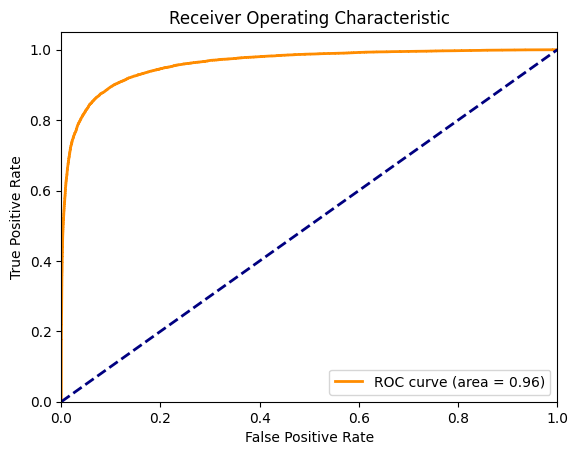

In [46]:
# Výpočet ROC AUC

#roc_auc = auc(fpr, tpr)

# Vykreslení ROC AUC grafu
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % val_auc_roc )
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

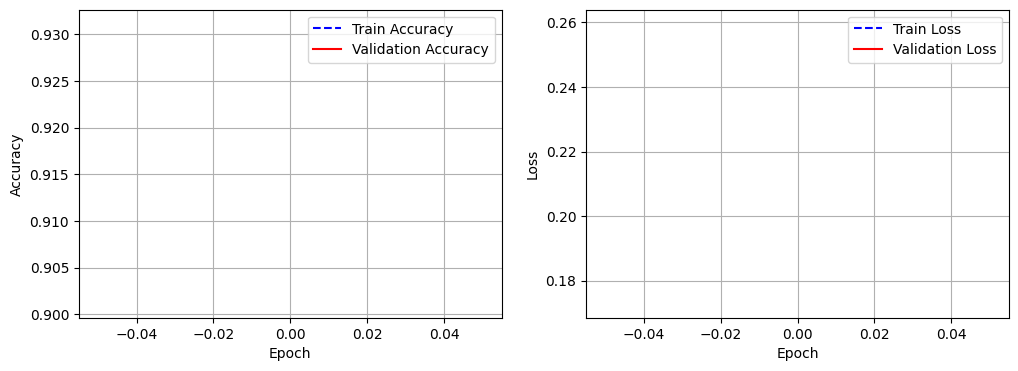

In [52]:
# Vykreslení grafů
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epoch_train_accuracies, 'b--', label='Train Accuracy')
plt.plot(epoch_val_accuracies, 'r-', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch_train_losses, 'b--', label='Train Loss')
plt.plot(epoch_val_losses, 'r-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.show()


# Sub

In [ ]:
# Přidání seznamu pro predikce
preds = []

# Vytvoření DataLoaderu pro test_data
test_data = CustomImageDataset('/content/histopathologic_cancer_detection/sample_submission.csv', '/content/histopathologic_cancer_detection/test', transform=transform)
test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

# Přepnutí modelu do evaluačního módu
model.eval()

# Vypočet predikcí pro testovací data
for images, labels in test_data_loader:
    # Předání dat do modelu
    outputs = model(images)

    # Převedení výstupů na pravděpodobnosti
    outputs = torch.sigmoid(outputs)

    # Přidání predikcí do seznamu
    preds.extend(outputs.detach().cpu().numpy())

# Konverze seznamu na numpy pole
preds = np.array(preds)

# Předpokládáme, že `sub` je DataFrame obsahující 'id' sloupec z 'sample_submission.csv'
sub['label'] = preds

# Převedení hodnot v sloupci 'label' na float
sub['label'] = sub['label'].astype(float)

# Uložení DataFrame do CSV souboru
sub.to_csv('submission.csv', index=False)

# Zobrazení prvních pěti řádků DataFrame
print(sub.head())


Výstupní stream byl oříznut na posledních 5000 řádků.
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 1])
torch.Size([32, 32, 15, 15])
torch.Size([32, 64, 6, 6])
torch.Size([32, 128, 2, 2])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 1])
torch.Size([32, 32, 15, 15])
torch.Size([32, 64, 6, 6])
torch.Size([32, 128, 2, 2])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 1])
torch.Size([32, 32, 15, 15])
torch.Size([32, 64, 6, 6])
torch.Size([32, 128, 2, 2])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 1])
torch.Size([32, 32, 15, 15])
torch.Size([32, 64, 6, 6])
torch.Size([32, 128, 2, 2])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 1])
torch.Size([32, 32, 15, 15])
torch.Size([32, 64, 6, 6])
torch.Size([32, 128, 2, 2])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 1])
torch.Size([32, 32, 15, 15])
tor